In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2023-11-02 14:42:12.156042: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 14:42:12.590607: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 14:42:12.590646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 14:42:12.593112: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 14:42:12.820310: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 14:42:14.361149: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

In [2]:
from sklearn.neural_network import MLPClassifier

import os
from os import listdir
from PIL import Image
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import tensorflow_hub as hub
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
import cv2

def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        # Convert the file extension to lowercase before checking
        if any([filename.lower().endswith(x) for x in ['.jpeg', '.jpg', '.png']]):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                # Resize the image to the specified target size
                img = cv2.resize(img, target_size)
                class_label = os.path.basename(folder)  # Extract the class label from the folder name
                images.append((img, class_label))  # Include class label and file name in the tuple
    return images

images_dir1 = load_and_resize_images_from_folder('Bacterial leaf blight')
images_dir2 = load_and_resize_images_from_folder('Brown spot')
images_dir3 = load_and_resize_images_from_folder('Leaf smut')


In [5]:
images_dir1[0]  #Checking if it works fine

(array([[[135, 147, 156],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[135, 146, 155],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[133, 147, 150],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

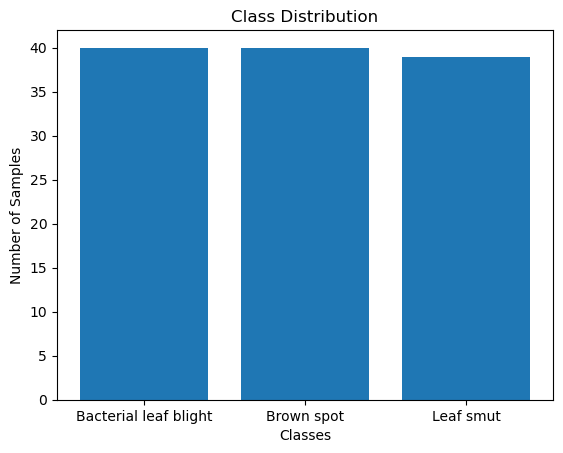

In [6]:
class_counts = {class_name: len(images) for class_name, images in {
    'Bacterial leaf blight': images_dir1,
    'Brown spot': images_dir2,
    'Leaf smut': images_dir3
}.items()}

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [7]:
no_of_samples = 15

dir1_set = images_dir1[:no_of_samples]
dir2_set = images_dir2[:no_of_samples]
dir3_set = images_dir3[:no_of_samples]

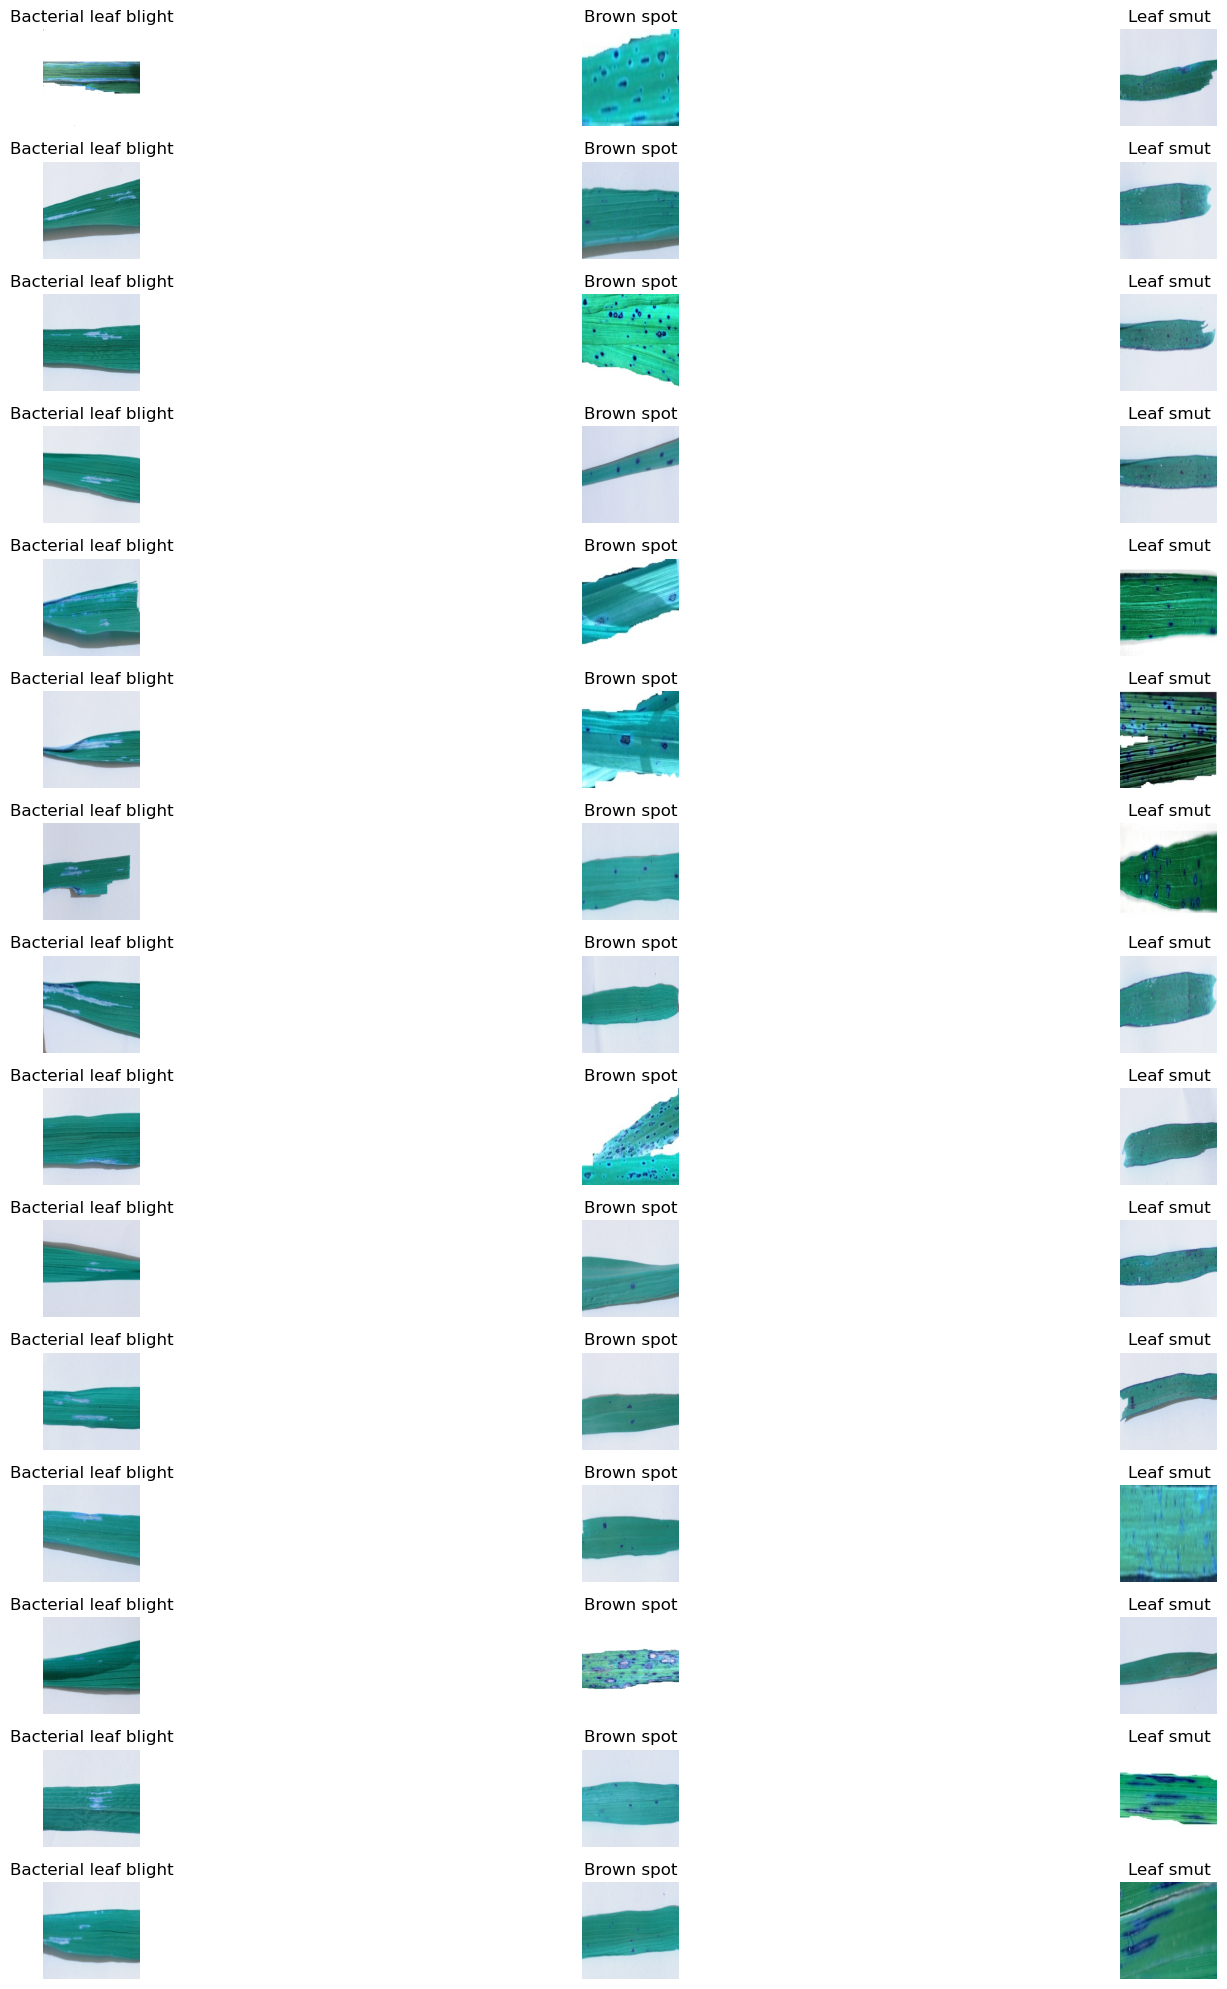

In [8]:
fig, axes = plt.subplots(nrows = no_of_samples, ncols = 3, figsize=(20,20))

for i in range(no_of_samples):
    axes[i,0].imshow(dir1_set[i][0])
    axes[i,0].set_title('Bacterial leaf blight')
    axes[i,0].axis('off')
    
    axes[i,1].imshow(dir2_set[i][0])
    axes[i,1].set_title('Brown spot')
    axes[i,1].axis('off')
    
    axes[i,2].imshow(dir3_set[i][0])
    axes[i,2].set_title('Leaf smut')
    axes[i,2].axis('off')
    
plt.tight_layout()
plt.show()

# Data Pre Processing

In [9]:
from tensorflow.keras.preprocessing.image import img_to_array

In [10]:
x_image = []
y_label = []

for img, class_label in images_dir1: 
    x_image.append(img)
    y_label.append(class_label)
    
for img, class_label in images_dir2:  
    x_image.append(img)
    y_label.append(class_label)
    
for img, class_label in images_dir3:
    x_image.append(img)
    y_label.append(class_label)


In [11]:
x_image

[array([[[135, 147, 156],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[135, 146, 155],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[133, 147, 150],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [12]:
y_label

['Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial leaf blight',
 'Bacterial 

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [14]:
#converting image and labels to arrays
x_image =np.array(x_image)
y_label = np.array(y_label)

y_encoded = label_encoder.fit_transform(y_label)

In [15]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
x_image.shape

(119, 224, 224, 3)

In [17]:
x_image = x_image / 255.0

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_image, y_encoded, test_size=0.2, random_state=42)

In [19]:
print(x_train.shape)
print(y_train.shape)

(95, 224, 224, 3)
(95,)


In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  
])


2023-11-02 14:42:55.892899: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 14:42:55.893707: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 7s 2s/step - loss: 5.7274 - accuracy: 0.2105 - val_loss: 1.0936 - val_accuracy: 0.3158
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 1.4142 - accuracy: 0.4211 - val_loss: 1.0798 - val_accuracy: 0.3158
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 1.0656 - accuracy: 0.4605 - val_loss: 1.1027 - val_accuracy: 0.3158
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 1.0310 - accuracy: 0.5000 - val_loss: 1.1062 - val_accuracy: 0.3158
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 0.9386 - accuracy: 0.6316 - val_loss: 1.0775 - val_accuracy: 0.3158
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 1.0117 - accuracy: 0.5132 - val_loss: 0.9947 - val_accuracy: 0.3158
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 0.9901 - accuracy: 0.4605 - val_loss: 0.8912 - val_accuracy: 0.6842
Epoch 8/30
3/3 [=========================

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 368ms/step - loss: 1.5560 - accuracy: 0.5417
Test accuracy: 0.5417


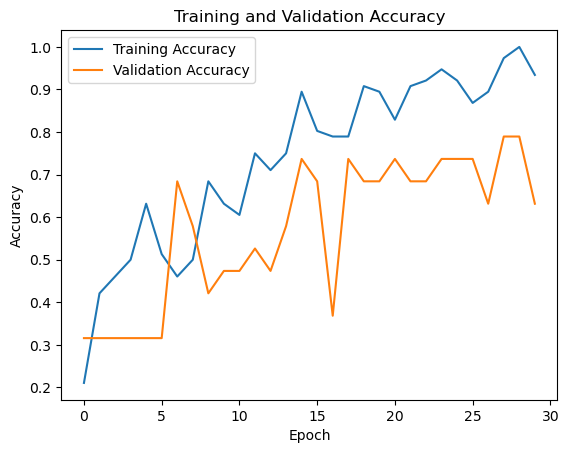

1/1 [==============================] - 0s 433ms/step


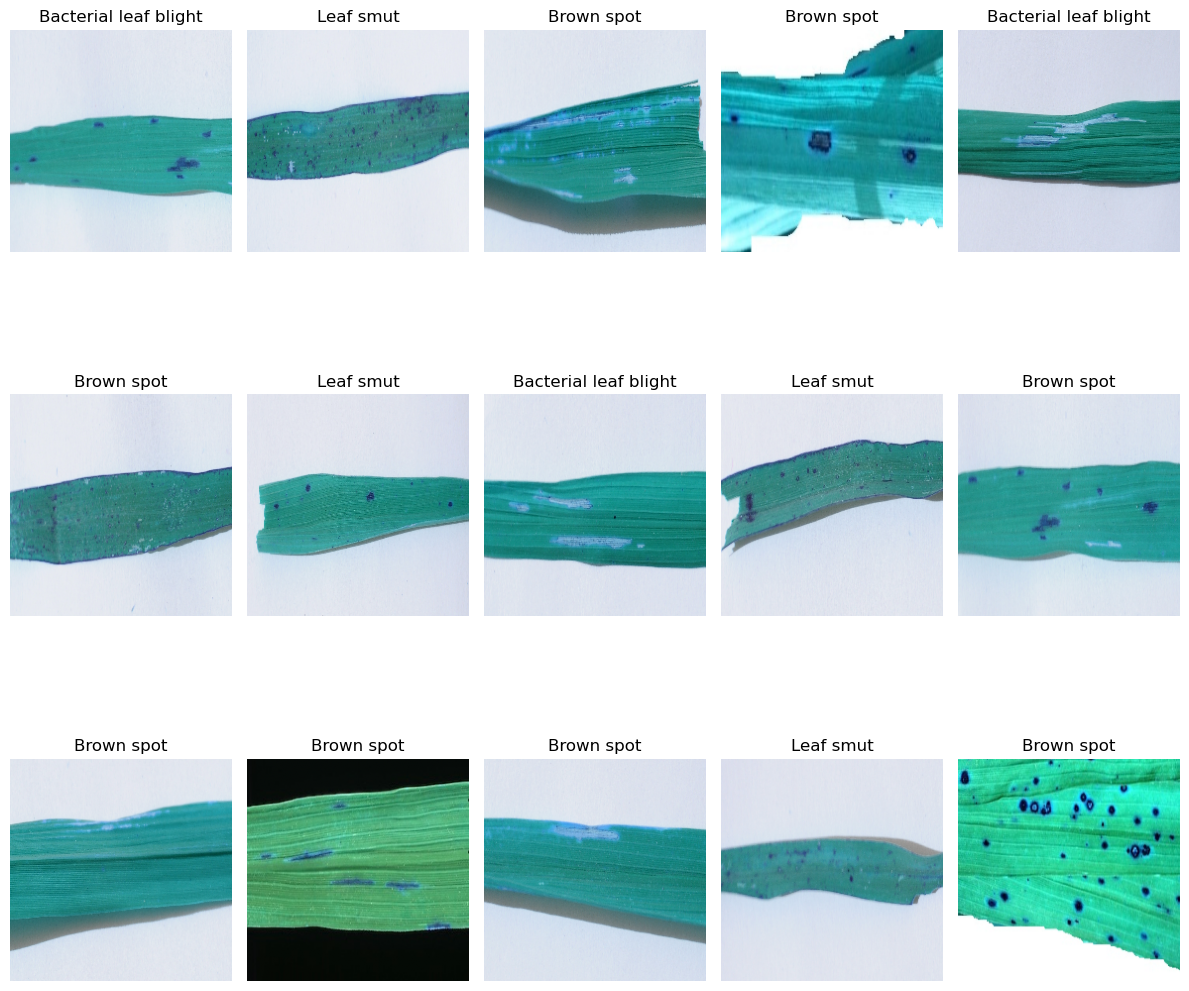

In [24]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

predicted_class_labels = label_encoder.inverse_transform(predicted_labels)

plt.figure(figsize=(12, 12))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(predicted_class_labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Hyper Parameter Tuning

In [25]:
learning_rate = 0.0001

model_hp = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax') 
])

In [26]:
optimizer = Adam(learning_rate=learning_rate)

In [27]:
model_hp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model_hp.fit(x_train, y_train, epochs=70, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model_hp.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/70
3/3 [==============================] - 7s 2s/step - loss: 1.0997 - accuracy: 0.4211 - val_loss: 1.2060 - val_accuracy: 0.3158
Epoch 2/70
3/3 [==============================] - 6s 2s/step - loss: 1.0649 - accuracy: 0.4211 - val_loss: 1.1043 - val_accuracy: 0.3684
Epoch 3/70
3/3 [==============================] - 7s 2s/step - loss: 1.0086 - accuracy: 0.5000 - val_loss: 1.1190 - val_accuracy: 0.2105
Epoch 4/70
3/3 [==============================] - 7s 2s/step - loss: 1.0750 - accuracy: 0.5132 - val_loss: 1.0626 - val_accuracy: 0.3684
Epoch 5/70
3/3 [==============================] - 8s 3s/step - loss: 0.9750 - accuracy: 0.5658 - val_loss: 0.9691 - val_accuracy: 0.6316
Epoch 6/70
3/3 [==============================] - 9s 3s/step - loss: 0.9447 - accuracy: 0.6053 - val_loss: 0.9768 - val_accuracy: 0.5263
Epoch 7/70
3/3 [==============================] - 13s 4s/step - loss: 0.9124 - accuracy: 0.5658 - val_loss: 1.0214 - val_accuracy: 0.3684
Epoch 8/70
3/3 [========================

Epoch 60/70
3/3 [==============================] - 33s 10s/step - loss: 0.0686 - accuracy: 0.9868 - val_loss: 0.4730 - val_accuracy: 0.6842
Epoch 61/70
3/3 [==============================] - 35s 11s/step - loss: 0.0756 - accuracy: 0.9868 - val_loss: 0.5055 - val_accuracy: 0.6842
Epoch 62/70
3/3 [==============================] - 39s 13s/step - loss: 0.1054 - accuracy: 0.9737 - val_loss: 0.4831 - val_accuracy: 0.7368
Epoch 63/70
3/3 [==============================] - 28s 9s/step - loss: 0.0792 - accuracy: 1.0000 - val_loss: 0.5061 - val_accuracy: 0.7368
Epoch 64/70
3/3 [==============================] - 33s 10s/step - loss: 0.0892 - accuracy: 0.9737 - val_loss: 0.5369 - val_accuracy: 0.6842
Epoch 65/70
3/3 [==============================] - 37s 12s/step - loss: 0.0850 - accuracy: 1.0000 - val_loss: 0.5754 - val_accuracy: 0.6842
Epoch 66/70
3/3 [==============================] - 34s 10s/step - loss: 0.0694 - accuracy: 0.9868 - val_loss: 0.5958 - val_accuracy: 0.6316
Epoch 67/70
3/3 [====

# Hyper Parameter Tuning with Data Augmentation

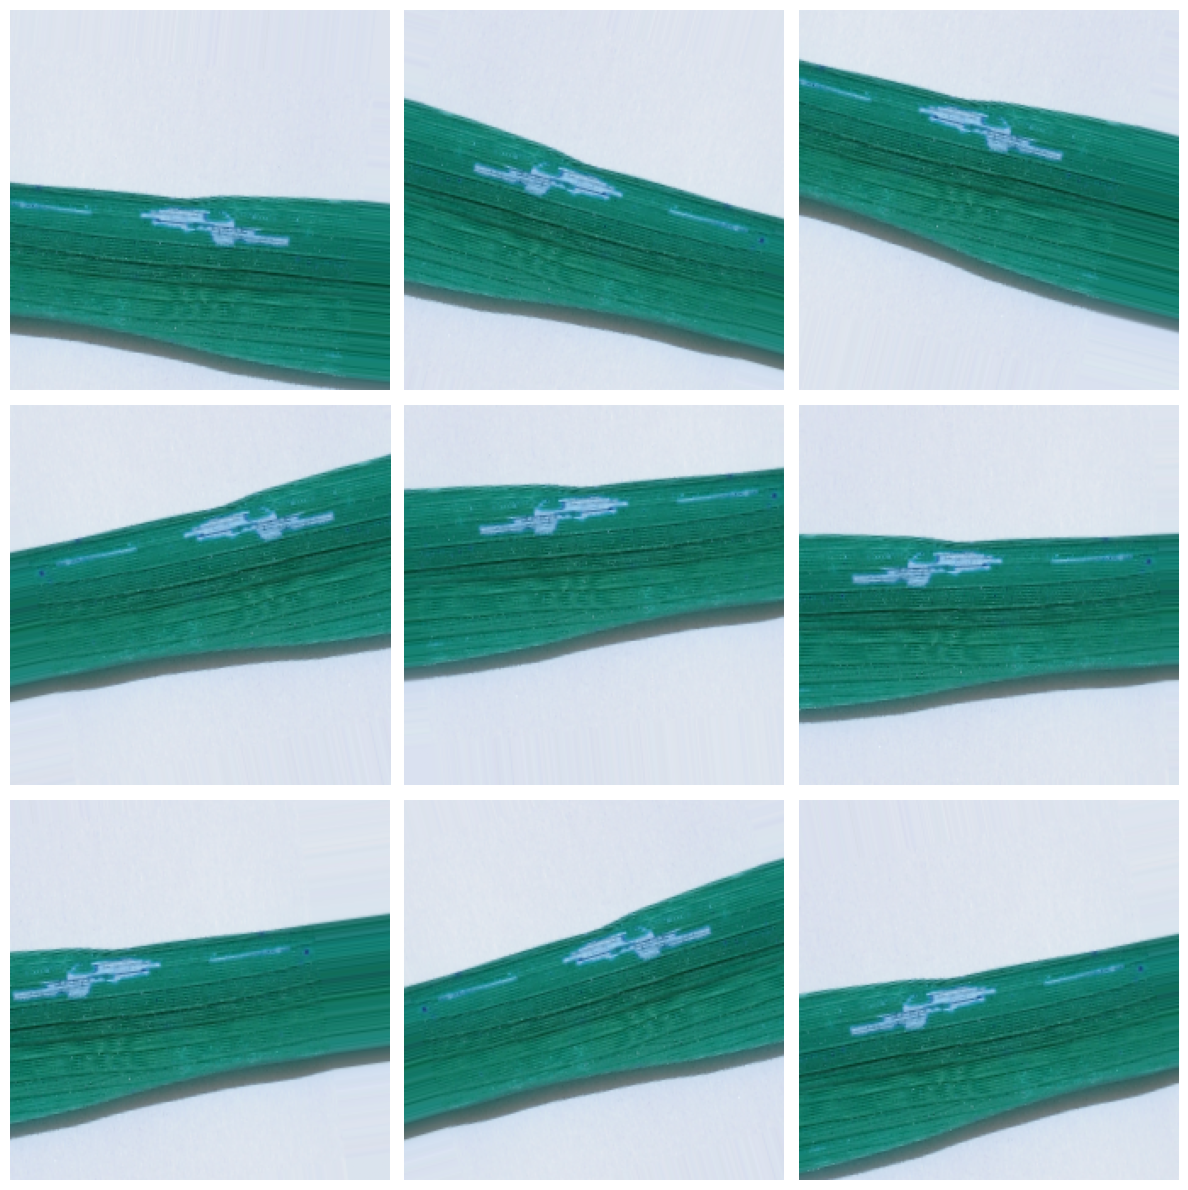

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

sample_image = x_image[2]
sample_image = np.expand_dims(sample_image, axis=0)

plt.figure(figsize=(12, 12))
for i, augmented_image in enumerate(data_generator.flow(sample_image, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis('off')
    if i == 8:
        break
plt.tight_layout()
plt.show()

In [30]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(
#     monitor='val_loss',  # Monitor the validation loss
#     patience=5,          # Number of epochs with no improvement to wait
#     restore_best_weights=True  # Restore the best model weights when stopping
# )


def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [31]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [32]:
input_shape = (224, 224, 3)
num_classes = len(label_encoder.classes_)
model_da = create_model(input_shape, num_classes)

In [33]:
augmented_data = datagen.flow(x_train, y_train, batch_size=32)

In [34]:
history = model_da.fit(augmented_data, epochs=70, steps_per_epoch=len(x_train) // 32, validation_data=(x_test, y_test))

Epoch 1/70
2/2 [==============================] - 6s 3s/step - loss: 2.7373 - accuracy: 0.2857 - val_loss: 2.1696 - val_accuracy: 0.3750
Epoch 2/70
2/2 [==============================] - 6s 3s/step - loss: 2.2402 - accuracy: 0.3492 - val_loss: 1.1446 - val_accuracy: 0.3333
Epoch 3/70
2/2 [==============================] - 6s 3s/step - loss: 1.1288 - accuracy: 0.3906 - val_loss: 1.0937 - val_accuracy: 0.3333
Epoch 4/70
2/2 [==============================] - 6s 3s/step - loss: 1.0965 - accuracy: 0.3492 - val_loss: 1.0999 - val_accuracy: 0.2917
Epoch 5/70
2/2 [==============================] - 6s 4s/step - loss: 1.0833 - accuracy: 0.3906 - val_loss: 1.0712 - val_accuracy: 0.3750
Epoch 6/70
2/2 [==============================] - 8s 4s/step - loss: 1.0811 - accuracy: 0.4062 - val_loss: 1.0239 - val_accuracy: 0.6250
Epoch 7/70
2/2 [==============================] - 9s 5s/step - loss: 1.0352 - accuracy: 0.4762 - val_loss: 1.0137 - val_accuracy: 0.3750
Epoch 8/70
2/2 [=========================

Epoch 60/70
2/2 [==============================] - 24s 13s/step - loss: 0.4596 - accuracy: 0.7812 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 61/70
2/2 [==============================] - 18s 10s/step - loss: 0.4862 - accuracy: 0.7500 - val_loss: 0.5443 - val_accuracy: 0.7500
Epoch 62/70
2/2 [==============================] - 21s 12s/step - loss: 0.5205 - accuracy: 0.7778 - val_loss: 0.5360 - val_accuracy: 0.7917
Epoch 63/70
2/2 [==============================] - 16s 9s/step - loss: 0.5219 - accuracy: 0.7188 - val_loss: 0.7682 - val_accuracy: 0.7083
Epoch 64/70
2/2 [==============================] - 18s 11s/step - loss: 0.4997 - accuracy: 0.8125 - val_loss: 1.3871 - val_accuracy: 0.7083
Epoch 65/70
2/2 [==============================] - 22s 12s/step - loss: 0.6713 - accuracy: 0.8125 - val_loss: 0.6996 - val_accuracy: 0.7083
Epoch 66/70
2/2 [==============================] - 28s 15s/step - loss: 0.5007 - accuracy: 0.7656 - val_loss: 0.7263 - val_accuracy: 0.7500
Epoch 67/70
2/2 [====

In [35]:
test_loss, test_accuracy = model_da.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 340ms/step - loss: 0.6888 - accuracy: 0.5833
Test accuracy: 0.5833


# Using Keras Tuner

In [ ]:
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters